In [1]:
import pandas as pd

In [2]:
car = pd.read_csv("quikr_car.txt")

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
car_year = car['year'].str.isnumeric()
car_year[car_year].sum()

842

In [7]:
car = car[car['year'].str.isnumeric()]

In [8]:
car['year'] = car['year'].astype(int)

In [9]:
df = car[car['Price'] == 'Ask For Price']
df.shape[0]

23

In [10]:
car = car[car['Price'] != 'Ask For Price']

In [11]:
car.shape

(819, 6)

In [12]:
car.Price = car.Price.str.replace(',','')

In [13]:
car.Price = car.Price.astype(int)

In [14]:
df1 = car[car['kms_driven'] == 'Petrol']
df1.shape[0]

2

In [15]:
car = car[car['kms_driven'] != 'Petrol']

In [16]:
car['kms_driven'] = car['kms_driven'].str.split().str.get(0)

In [17]:
car['kms_driven'] = car['kms_driven'].str.replace(',','')

In [18]:
car=car[car['kms_driven'].str.isnumeric()]

In [19]:
car['kms_driven']=car['kms_driven'].astype(int)


In [20]:
car=car[~car['fuel_type'].isna()]

In [21]:
def change(row):
    count = 0
    x = []
    for i in row.split():
        x.append(i)
        count+=1
        if count ==3:
            break
    return ' '.join(x)
        

In [22]:
car.name = car['name'].apply(lambda x:change(x))

In [23]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

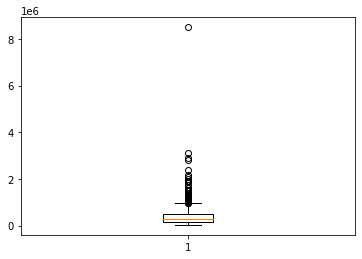

In [25]:
#Plotting boxplot to find the outliers in the price column.
plt.boxplot(car['Price'])
plt.show()

In [26]:
car[car['Price'] > 4000000]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [27]:
car = car[car['Price'] < 4000000]

In [84]:
#Splitting dataframe into dependent and independent features.
X = car[['name','company','year','kms_driven','fuel_type']]
y = car['Price']

In [85]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [89]:
import seaborn as sns


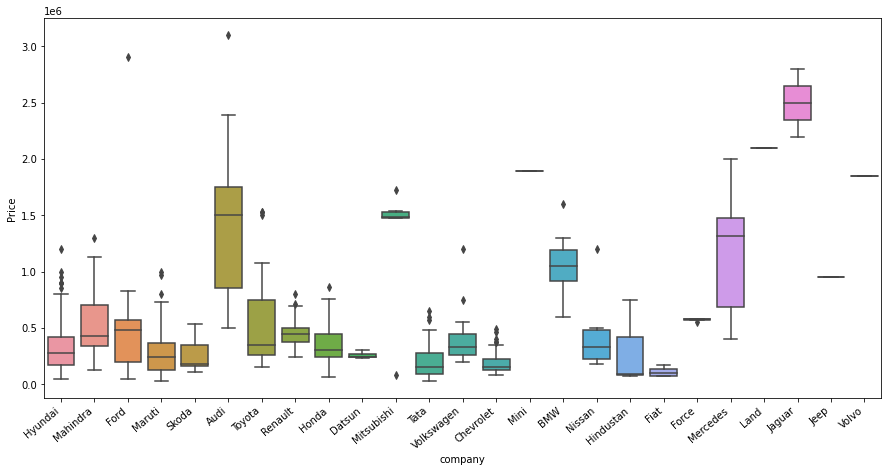

In [90]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\python 310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\python 310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\python 310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\python 310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


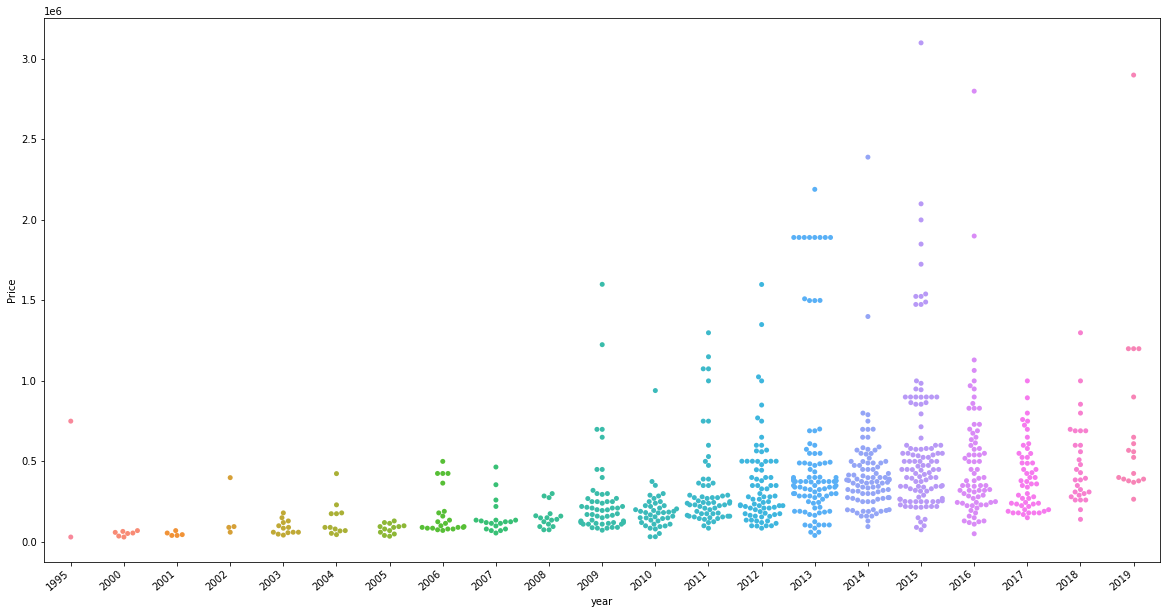

In [91]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

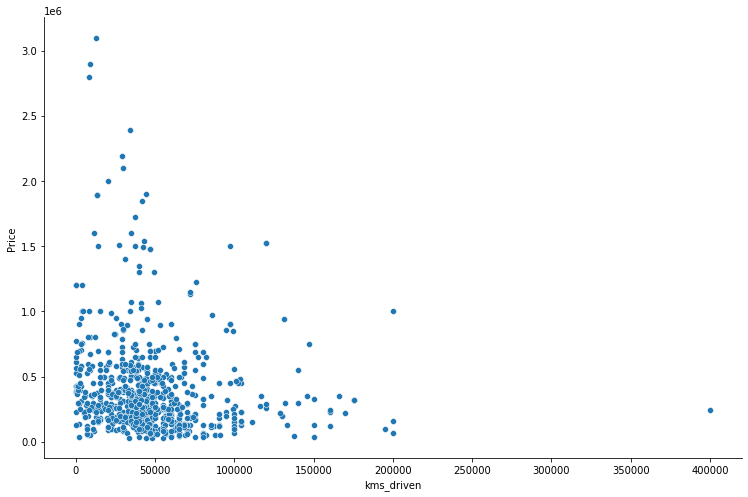

In [92]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)


<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

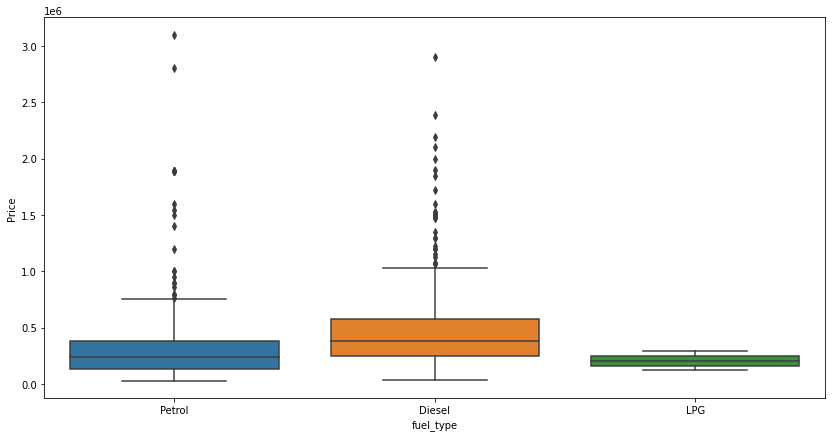

In [93]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

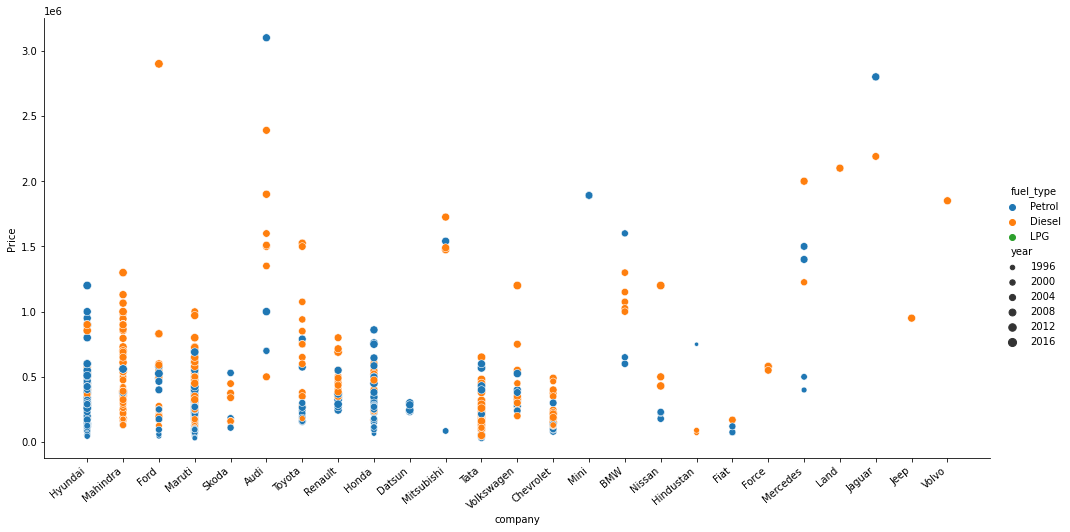

In [94]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Importing train test split and other necessary classes for our model.

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
from sklearn.linear_model import Ridge

In [32]:
from sklearn.linear_model import Lasso

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

### Applying one-hot-encoding on name, company and fuel_type column.

In [34]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [35]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                      remainder='passthrough')

In [36]:
lr = LinearRegression()

In [37]:
pipe=make_pipeline(column_trans,lr)

In [38]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [39]:
y_pred = pipe.predict(X_test)

In [40]:
r2_score(y_test,y_pred)

0.6819938980042053

In [41]:
rg = Ridge()

In [42]:
pipe=make_pipeline(column_trans,rg)

In [43]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('ridge', Ridge())])

In [44]:
y_pred = pipe.predict(X_test)

In [45]:
r2_score(y_test,y_pred)

0.016240632394510568

In [46]:
lo = Lasso()

In [47]:
pipe=make_pipeline(column_trans,lo)

In [48]:
pipe.fit(X_train,y_train)

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 859820619069.9016, tolerance: 10197852015.2576
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('lasso', Lasso())])

In [49]:
y_pred = pipe.predict(X_test)

In [50]:
r2_score(y_test,y_pred)

0.5602354158660168

In [80]:
#To find the best value of random state for best accuracy, turns out that at a value of 440 r2_score is maximum.
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    pipe=make_pipeline(column_trans,lo)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948903942989.398, tolerance: 10901402956.699667
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 658995353409.686, tolerance: 11117609493.33183
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472151430104.728, tolerance: 10372845569.446478
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not con

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 965780685215.1709, tolerance: 10613899258.372952
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504218068497.4497, tolerance: 10606495934.299583
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1126282003220.5781, tolerance: 10072186761.909489
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did no

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496288483115.68994, tolerance: 10623049024.453093
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734833869793.0923, tolerance: 10575583839.783127
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631891493343.31, tolerance: 10903687814.66612
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not c

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 711815475024.5591, tolerance: 10821365691.555672
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 760093716045.6797, tolerance: 10478803012.531721
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 804336973893.7725, tolerance: 10190897932.458511
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 858805306622.9102, tolerance: 11323260053.809326
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876604178366.7612, tolerance: 11260712154.197409
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604078594912.8857, tolerance: 11022875331.715418
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 932302490899.896, tolerance: 10943663977.25629
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883020523535.4312, tolerance: 10410370156.248478
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 941717224200.1929, tolerance: 10894039146.944899
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not c

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 718833150606.2168, tolerance: 11200607693.302128
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1178956576364.9526, tolerance: 9715671251.011368
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 640735515283.0806, tolerance: 10766329337.06987
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not 

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 695794897056.1108, tolerance: 11426632636.902878
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 914258147225.4463, tolerance: 10681325277.702232
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900522532504.104, tolerance: 11458074125.834148
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not 

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594482070314.3906, tolerance: 11109675065.6782
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 787263981503.106, tolerance: 10264386110.329035
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469800591259.1714, tolerance: 10616098058.107567
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not co

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558273564121.8408, tolerance: 9736049311.538609
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 638665226815.4033, tolerance: 11040098619.670637
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 863578384803.8691, tolerance: 11157291525.160889
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not 

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782131036665.4521, tolerance: 10312609640.371286
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015518205083.8027, tolerance: 10951722074.663559
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 830584424667.9995, tolerance: 9630842957.247395
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1103646118774.4224, tolerance: 10451416294.231617
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1202909460350.565, tolerance: 11102439033.83808
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 902124563354.7578, tolerance: 10884069601.074514
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454286810291.16113, tolerance: 10653264038.540257
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 650816497912.2676, tolerance: 11119080799.012154
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777870114241.3345, tolerance: 10903619922.019686
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did no

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768892425973.2446, tolerance: 10719934523.800207
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795532729595.8345, tolerance: 10610066249.19938
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806860655557.3081, tolerance: 10772038933.568144
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not 

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 638511163486.936, tolerance: 10566446220.692598
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792549708894.0669, tolerance: 11275489102.742378
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666871020475.977, tolerance: 10571328536.540365
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not c

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 720922386477.3652, tolerance: 10906667077.636524
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 894556029362.3901, tolerance: 10291388330.492903
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777898563647.5425, tolerance: 10202206545.481314
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 686335329370.852, tolerance: 11177616233.259575
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724948719226.9541, tolerance: 10823103491.068031
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 803668159634.9663, tolerance: 10640414404.845148
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not 

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583779559597.3345, tolerance: 9957858394.19246
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 627072924955.2515, tolerance: 10766549007.208727
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948255784451.5732, tolerance: 10341437901.69246
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not co

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403482092591.96387, tolerance: 10733512058.035292
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 826348460095.3203, tolerance: 10931227659.086067
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553209886974.1123, tolerance: 11073895178.142277
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did no

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 778399551073.6743, tolerance: 11299905625.281633
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1023945619272.3057, tolerance: 11093806672.296316
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 860160254117.3335, tolerance: 10810316462.324995
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did no

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 886649723210.3394, tolerance: 11040900462.675299
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 875137150679.7979, tolerance: 9643257920.727573
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 637247085092.4824, tolerance: 10617444562.311754
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not 

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 587292838385.8306, tolerance: 10332884669.59874
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 581682680667.7881, tolerance: 10043321375.229433
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680231585089.2812, tolerance: 11043184631.554165
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not 

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1060147107074.2666, tolerance: 10685043403.528143
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 701563258720.8511, tolerance: 10524774698.646292
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786090389123.123, tolerance: 10795712924.266487
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1047195062909.3752, tolerance: 9713317106.42629
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 682239856638.6768, tolerance: 11109653837.667004
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631548400746.5181, tolerance: 11253428506.800394
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not 

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 820095036204.8535, tolerance: 10547027969.228756
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 871984641550.2578, tolerance: 10544754678.608513
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639517195905.6655, tolerance: 11235876548.469397
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 849204768181.9822, tolerance: 11295426904.147228
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 849016496468.4878, tolerance: 10150676923.736275
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517947802441.3823, tolerance: 10763356863.990292
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 830264343491.1396, tolerance: 11069431835.682919
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1037890137453.5894, tolerance: 11030292166.967178
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 908881933256.7471, tolerance: 11273258226.953094
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did no

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1175815427958.6519, tolerance: 11172234050.945503
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 886115651435.3188, tolerance: 11056470849.92256
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 740921238124.0894, tolerance: 10855627204.836657
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 856959017291.6177, tolerance: 10903937791.54537
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 824090698860.5991, tolerance: 11130090702.793146
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559681600479.2969, tolerance: 10995937934.105074
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not 

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799024575690.833, tolerance: 9695829721.058523
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561800076705.4287, tolerance: 10975364064.76087
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 672976993102.6709, tolerance: 10742082783.19693
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not con

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 784816974659.2397, tolerance: 10761932064.545534
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913294094577.6421, tolerance: 10773868982.781366
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 827425114470.1445, tolerance: 10521907423.767212
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724229391510.481, tolerance: 10855254394.690866
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604801573667.6533, tolerance: 10789468560.22695
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 614196416497.2075, tolerance: 10261973736.475405
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not c

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1152182586062.7573, tolerance: 11303576853.97861
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388162844276.3545, tolerance: 10165245850.48732
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1132392464387.6099, tolerance: 11097169686.985958
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591332328832.6431, tolerance: 9862330354.678986
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 850348826011.083, tolerance: 10772608115.527145
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 739266800382.1255, tolerance: 10318802930.126682
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not c

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 683586125872.1372, tolerance: 10649174182.928923
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 742416255709.6123, tolerance: 11068169990.211185
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679322608050.6294, tolerance: 10783941648.858574
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not

C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494918044222.1133, tolerance: 10513809628.62665
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645463888855.4282, tolerance: 10345614318.698399
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 852859857523.4692, tolerance: 11126823541.613089
  model = cd_fast.sparse_enet_coordinate_descent(
C:\python 310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not 

In [81]:
import numpy as np

In [82]:
np.argmax(scores)

440

In [83]:
scores[np.argmax(scores)]

0.9268619041586041